In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Generate data

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[-3.39097789 -2.1687265  -1.5273671  -1.28084823 -0.60580413 -0.30059016
 -0.39087721 -0.13460854 -0.03293642 -0.35196978  0.03320616 -0.17990461
 -0.0054523   0.22507981  0.3184915   0.746219    1.03934835  1.69799062
  2.38626674  3.36022083]


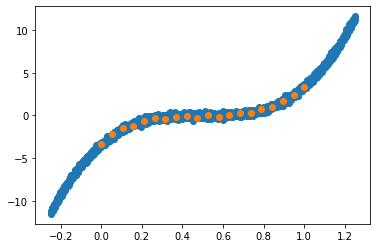

In [5]:
N = 0.2  # Noise level
D = 20  # Training set size

# Generate training data
X = np.linspace(0,1,D)
Y = (3*(X-0.5))**3 + N*(np.random.randn(D))

# Generate test data
X_test = np.linspace(-0.25,1.25,1500)
Y_test = (3*(X_test-0.5))**3 + N*(np.random.randn(1500))
print(X)
print(Y)
# Plot data
plt.scatter(X_test, Y_test)
plt.scatter(X,Y)
plt.show()


# Apply linear regression

In [6]:
# Add constant feature to enable bias
XX = np.array([np.ones(X.shape[0]), X]).T

# Apply normal equations
W = np.linalg.inv(XX.T @ XX ) @ XX.T @ Y

# Plot hypothesis

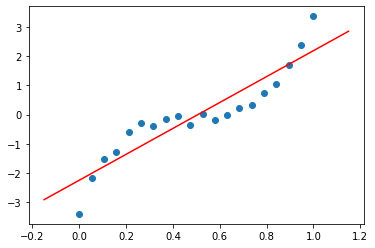

In [7]:
# just a grid of x coordinates
x = np.linspace(-0.15, 1.15, 1000)  

# add constant feature to the grid to enable calcualtion
xx = np.array([np.ones(x.shape[0]), x]).T  

# apply hypothesis to feature grid
y = xx @ W.T  

# Plot training points and hypothesis
plt.scatter(X, Y)
plt.plot(x, y, 'r')
plt.show()

# Fit a 3rd order polynomial 

In [5]:
# create features for order 2 and 3 terms
XX = np.array([np.ones(X.shape[0]), X, X**2, X**3]).T

# Apply normal equations
W = np.linalg.inv(XX.T @ XX ) @ XX.T @ Y

print(W)

[ -3.55917471  22.32374419 -45.84122558  30.58563598]


# Plot hypothesis

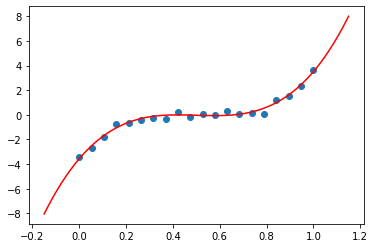

In [6]:
# just a grid of x coordinates
x = np.linspace(-0.15, 1.15, 1000)  

# create features for order 2 and 3 terms
xx = np.array([np.ones(x.shape[0]), x, x**2, x**3]).T

# apply hypothesis to feature grid
y = xx @ W.T  

# Plot training points and hypothesis
plt.scatter(X, Y)
plt.plot(x, y, 'r')
plt.show()

# Fit a P-order polynomial

In [7]:
def polyfit(X, Y, p):
    # Create new features
    XX = X[:, None] ** range(p+1)
    
    # Apply normal eqautions
    # return np.linalg.inv(XX.T @ XX ) @ XX.T @ Y
    return np.linalg.pinv(XX) @ Y  # Using pseudo-inverse is a more stable calculation
    

p = 8
W = polyfit(X, Y, p)

# Plot hypothesis

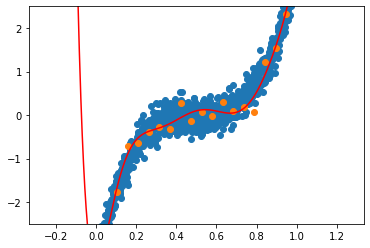

In [8]:
def plot_hypothesis(W, p, show_test):
    if show_test:
        plt.scatter(X_test, Y_test)
    plt.scatter(X, Y)
    x = np.linspace(-0.15, 1.15, 1000)  
    xx = x[:, None] ** range(p+1)
    y = xx @ W.T
    plt.plot(x, y, 'r')
    plt.ylim(-2.5,2.5)
    plt.show()

plot_hypothesis(W, p, True)    

# Compare performace of varying-order polynomials

P =  0 
Train Error: 2.3249208165226762 
Test Error: 18.653944838396715


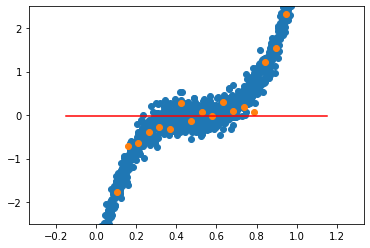

P =  1 
Train Error: 0.47997956745594045 
Test Error: 7.080286905986362


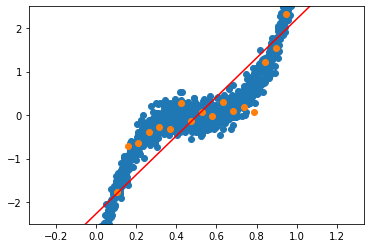

P =  2 
Train Error: 0.47997023212792705 
Test Error: 7.080241055361924


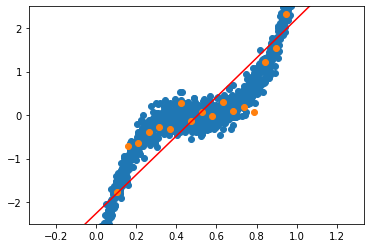

P =  3 
Train Error: 0.041237301987622925 
Test Error: 0.1682182547764369


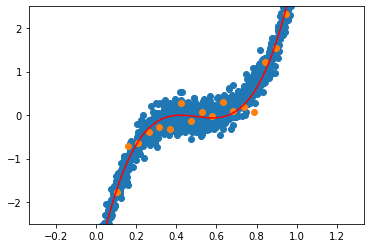

P =  4 
Train Error: 0.03923468013655393 
Test Error: 0.3563675364588778


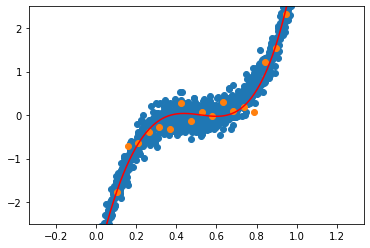

P =  5 
Train Error: 0.03650268801652502 
Test Error: 2.4634918087622606


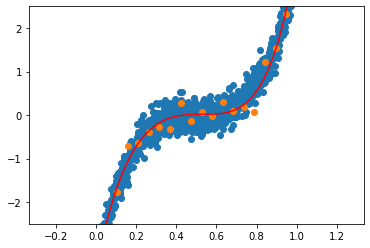

P =  6 
Train Error: 0.03648521395669852 
Test Error: 2.6959347537117684


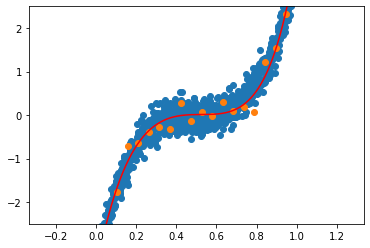

P =  7 
Train Error: 0.032001932593688734 
Test Error: 51.318808816150316


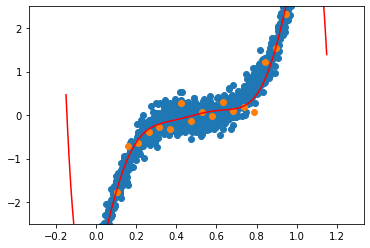

P =  8 
Train Error: 0.02662096598564479 
Test Error: 660.8147767270183


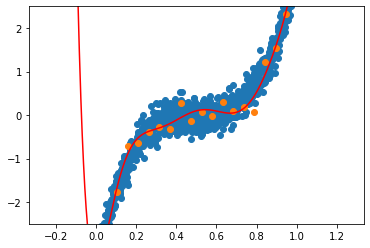

P =  9 
Train Error: 0.026395542873963944 
Test Error: 646.4820733880109


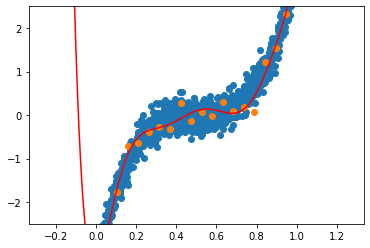

P =  10 
Train Error: 0.024051198869855742 
Test Error: 20376.091049380237


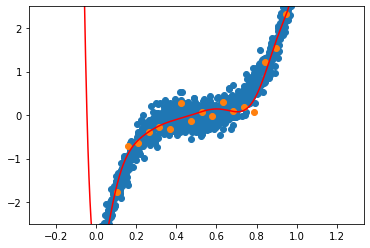

P =  11 
Train Error: 0.021990531772413592 
Test Error: 129414.00474437316


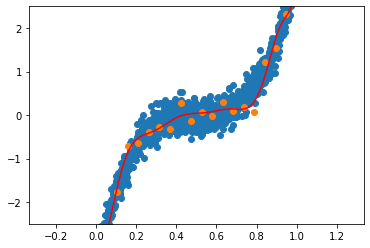

P =  12 
Train Error: 0.017388472886486307 
Test Error: 1958473.3411256524


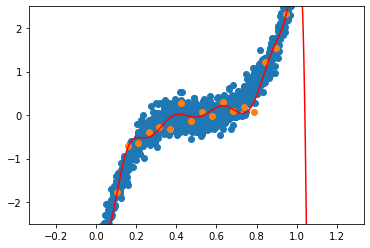

P =  13 
Train Error: 0.015378513185925402 
Test Error: 10564704.373554215


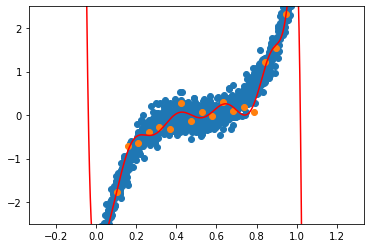

P =  14 
Train Error: 0.01203858081015133 
Test Error: 278929271.3074249


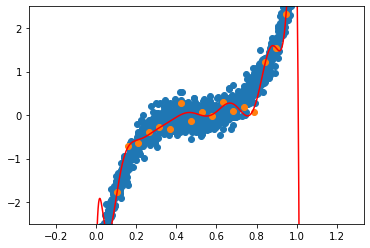

P =  15 
Train Error: 0.012008821329538897 
Test Error: 277018455.2703772


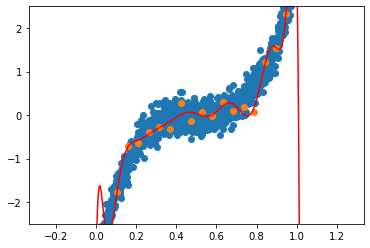

P =  16 
Train Error: 0.00712457299397941 
Test Error: 106508209710.4285


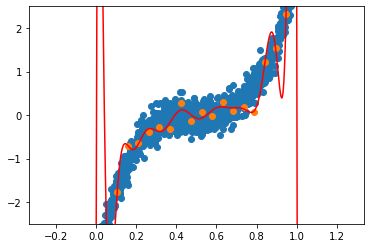

P =  17 
Train Error: 0.00658864306329638 
Test Error: 370432014833.7808


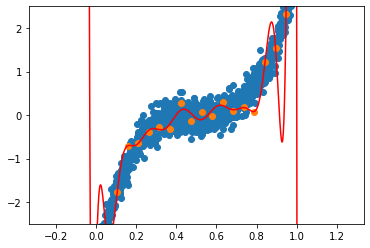

P =  18 
Train Error: 0.006496525955165343 
Test Error: 1242099240029.4583


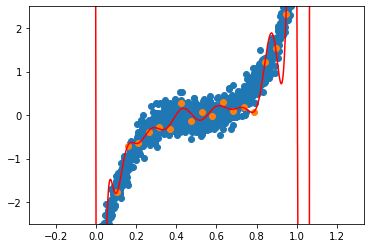

P =  19 
Train Error: 0.006571943805725596 
Test Error: 161233099609.52542


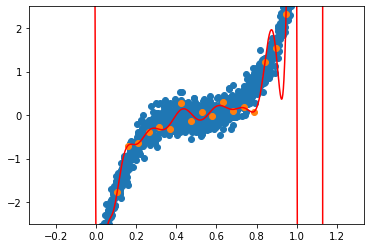

P =  20 
Train Error: 0.006615248158553343 
Test Error: 38925219497.26573


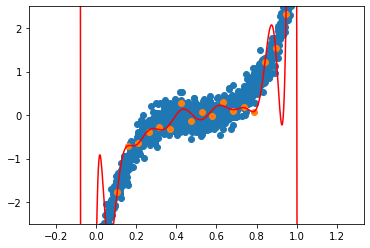

P =  21 
Train Error: 2.156536957842283e-06 
Test Error: 2.282211538697767e+16


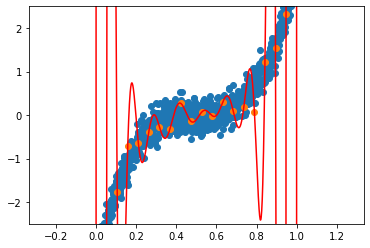

P =  22 
Train Error: 8.675049772525421e-07 
Test Error: 4.933564258347116e+16


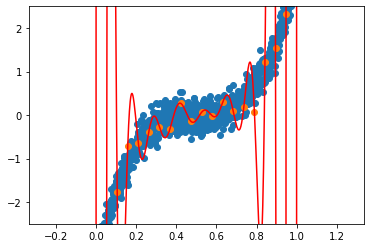

P =  23 
Train Error: 6.533386421743175e-07 
Test Error: 1.0802705381062282e+17


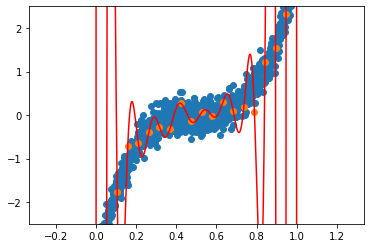

P =  24 
Train Error: 1.7259158367312942e-08 
Test Error: 2.3628418976258602e+17


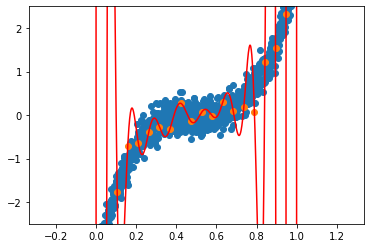

P =  25 
Train Error: 8.443757777557905e-09 
Test Error: 5.1470976298991635e+17


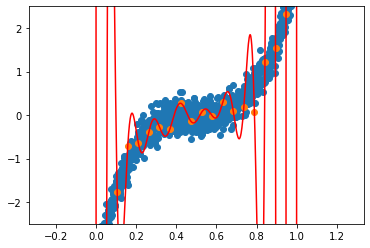

P =  26 
Train Error: 2.967611176026002e-09 
Test Error: 1.1155435565834252e+18


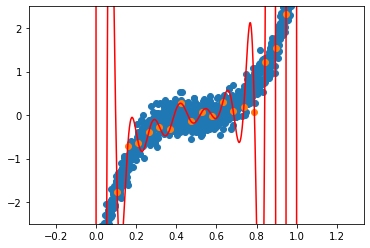

P =  27 
Train Error: 2.3345397715747187e-09 
Test Error: 2.404262565604914e+18


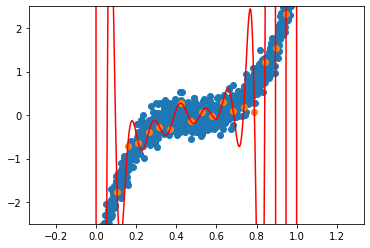

P =  28 
Train Error: 6.66821811945422e-10 
Test Error: 5.14884933995851e+18


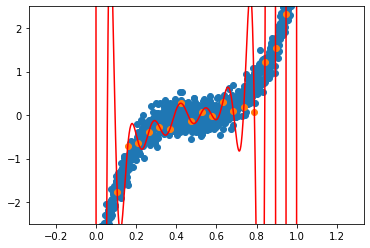

P =  29 
Train Error: 1.9397348268089593e-10 
Test Error: 1.0951494927032553e+19


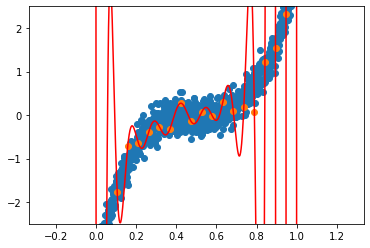

P =  30 
Train Error: 2.017599064782625e-10 
Test Error: 2.312562474900925e+19


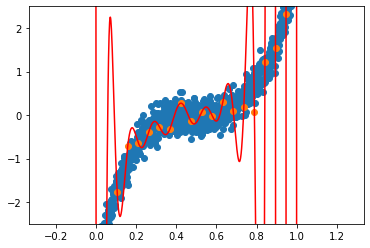

P =  31 
Train Error: 2.385192270333602e-10 
Test Error: 4.846355925094117e+19


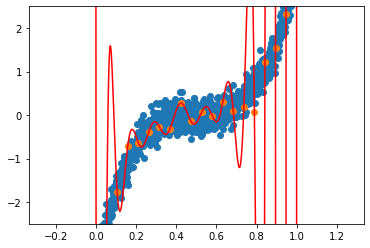

P =  32 
Train Error: 3.220172735156448e-10 
Test Error: 1.0076691091240559e+20


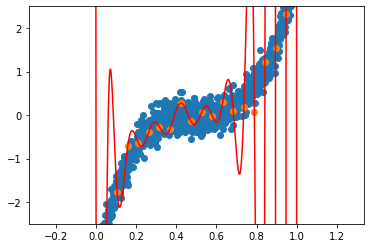

P =  33 
Train Error: 7.325071733133581e-11 
Test Error: 2.0782995041521277e+20


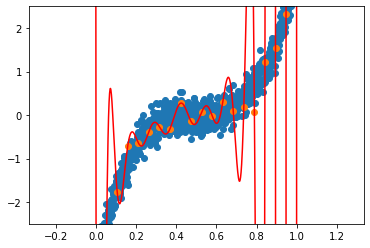

P =  34 
Train Error: 3.675333629084987e-11 
Test Error: 4.251250277311618e+20


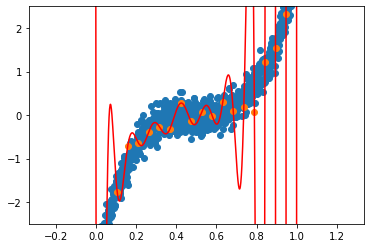

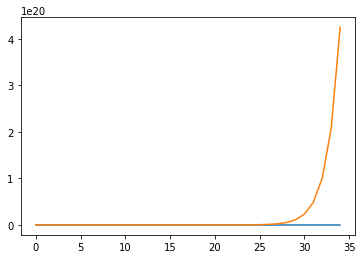

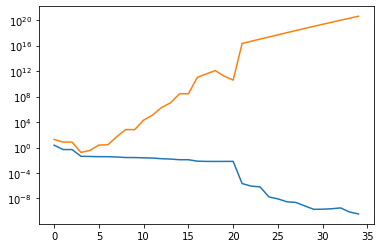

In [9]:
P = 35
train_err = [None] * (P)
test_err = [None] * (P)

for p in range(P):
    W = polyfit(X, Y, p)
    
    XX = X[:, None] ** range(p+1)
    Y_pred_train = XX @ W.T
    
    XX_test = X_test[:, None] ** range(p+1)
    Y_pred_test = XX_test @ W.T
        
    train_err[p] = np.sum((Y_pred_train - Y) ** 2) / Y_pred_train.shape[0]
    test_err[p] = np.sum((Y_pred_test - Y_test) ** 2) / Y_pred_test.shape[0]
    print('P = ', p, '\nTrain Error:', train_err[p], '\nTest Error:', test_err[p])
    plot_hypothesis(W, p, True)
    


plt.plot(range(P), train_err)
plt.plot(range(P), test_err)
plt.show()

plt.semilogy(range(P), train_err)
plt.semilogy(range(P), test_err)
plt.show()

In [10]:
x = np.array([[3, 4], [6, 8]])
x @ x

array([[33, 44],
       [66, 88]])